# Principal Component Analysis: A Structural Risk Minimization based Tutorial by Dr. Fayyaz Minhas

The objective of this tutorial is to provide a fundamental (though somewhat simplistic) description of principal component analysis in a "learn-by-doing" style approach in which you are asked questions that can be answered by playing with the code included in the tutorial.

How can we find redundant or dimensions with little or no information in a given data? Remember, that for a given variable, the amount of information in it is proportional to its variance -- if all data is constant then its variance is zero and so is its information content. If we have very high dimensional data, we can reduce its dimensionality by projecting it along directions (or vectors) of maximum variance. For example, consider two (related) variables: height and weight of all individuals in a class. If we can (somehow) predict the weight from the  height then we do not need to store the weight dimension for all data points. However, without such a prediction system in place or if there is no relationship between weight and height, it will be impossible to reconstruct weight from height and the information of weight will be lost for ever. However, if the weight of an individual is linearly dependent (aka proportional) to his or her height, then we can fit a simple line to get one from the other by reducing the error between the true value of weight and the value predicted on the basis of height (called the reconstruction error). 

Principal component analysis is a method for minimum-loss dimensionality redution that works by finding the directions of maxium variance and projecting your data along these direction. This projection along the direction of maximum variance gives minimum information loss. Below, we discuss how finding the direction of maximum variance for a given data set corresponds to finding the eigen vector of the covariance matrix of the data.

Let's assume that we are given N d-dimensional data points $x_i, i=1...N$. We want to find the direction vector $w$ such that the projection $z_i=w^Tx_i$ for a point $x_i$ has maximum variance. Let's calculate the variance after projection of the data along $w$. We know that variance of $z_i, i=1...N$ is the expected (average) value of the squared deviation $(z_i-\mu_z)$ around the mean value $\mu_z = \frac{1}{N}\sum_{i=1}^{N}z_i=\frac{1}{N}\sum_{i=1}^{N}w^Tx_i=w^T\frac{1}{N}\sum_{i=1}^{N}x_i=w^T\mu_x$ where $\mu_x=\frac{1}{N}\sum_{i=1}^{N}x_i$ is the vector of average values of all data points. Therefore,

$var(z)=var(w^Tx)=\frac{1}{N}\sum_{i=1}^{N}[(w^Tx_i-w^T\mu_x)^2]=\frac{1}{N}\sum_{i=1}^{N}[(w^Tx_i-w^T\mu_x)(w^Tx_i-w^T\mu_x)]=\frac{1}{N}\sum_{i=1}^{N}[w^T(x_i-\mu_x)(x_i-\mu_x)^Tw]=w^T\frac{1}{N}\sum_{i=1}^{N}[(x_i-\mu_x)(x_i-\mu_x)^T]w=w^TCw$

Here, $C=\frac{1}{N}\sum_{i=1}^{N}[(x_i-\mu_x)(x_i-\mu_x)^T]$ is the covariance matrix. Covariance of two variable $a$ and $b$ over $N$ values $a_i,b_i, i=1...N$ is given by $c(a,b) = \frac{1}{N}\sum_{i=1}^{N}[(a_i-\mu_a)(b_i-\mu_b)^T]$ is a measure of the linear relationship between two variables - in our case two dimensions of $x$ or two of our features. Covariance will be high (positive) if increase in values of one variable above its mean correlates with increase in values of the other variable above the other variable's mean value. Covariance will be high (negative) if increase in values of one variable above its mean correlates with decrease in values of the other variable below the other variable's mean value. Covariance will be low (small positive or negative) if increase in values of one variable above its mean has little effect or little correlation with increase in values of the other variable above the other variable's mean value. In our example below, we take two variables, height and weight of a person which are expected to be correlated and exhibit high covariance. It is interesting to note that if we take a single variable $b=a$ then variance becomes covariance. A covariance matrix of $d$ variables is a $d$ by $d$ matrix of all pairwise covariances. Note that the covariance matrix will be symmetric since $cov(a,b)=cov(b,a)$.  It is typically better to scale the variables to the same range prior to covariance calculation to reduce effects of differences in range of values from affecting the covariance value. This can be achieved by subtracting the value of a variable from its mean and dividing by its standard deviation in a process called mean-standard deviation normalization (or standardization).

Uptil now we have expressed the variance of the projected data in terms of the weight vector used for projection and its covariance matrix. Now using the princple of structural risk minimization, the machine learning problem of finding the optimal direction vector $w$ that minimize the error of reconstruction after projection while ensuring regulrization can be written as:

$min_w E(w)+\alpha R(w)$

Where E is the error term and R controls the (inverse of) regularization. Since error is inversely related to variance of $z$, we can write this learning problem as follows:

$max_w var(z)-\alpha ||w||^2$ (for $\alpha \ge 0$)

or

$max_w w^TCw-\alpha w^Tw$

Here, we want to minimize the value of the norm of $w$ (hence the negative in front of it) while maximizing the variance. 

Taking the derivative with respect to $w^T$ and substituting to zero, we get:

$Cw=\alpha w$

Which is an Eigen value problem. An Eigen vector $w$ is a property of a matrix $C$ such that the vector resulting from matrix multiplication $Cw$ is in the same direction as $w$ with only scaling by a corresponding constant factor $\alpha$ called Eigen value. The number of Eigen values and vectors is equal to the number of dimensions of the matrix. These vectors of a covriance matrix are called principal components as they correspond to directions of maximal variance. Hence the name "Principal Component Analysis".

Thus, the direction of maximum variance $w$ corresponds to the Eigen vector of the covariance matrix $C$. Thus, if we find the Eigen vectors of the covariance matrix, we can get what we want.

Now to test it, let's generate some data.

In [119]:
import numpy as np
weights = np.array([55,74,58,52,58,67,80,71,62,69,72,67,78])
heights = np.array([56, 73, 60, 54, 56, 62, 77, 73, 72, 69, 74, 67, 84,])

And plot it!

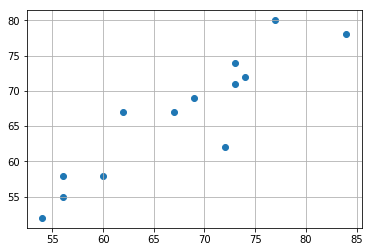

In [120]:
import matplotlib.pyplot as plt
plt.scatter(heights,weights)
plt.grid()
plt.show()

Let's make the data into a numpy array and get the mean and standard deviation of the data so we can normalize it to have zero mean and unit standard deviation along each dimension.

In [121]:
X = np.vstack((heights,weights)).T
print("The dimensions of X are",X.shape)
Xm = np.mean(X,axis=0)
Xs = np.std(X,axis=0)
print("The mean is",Xm)
print("The standard deviation is",Xs)

The dimensions of X are (13, 2)
The mean is [67.46153846 66.38461538]
The standard deviation is [8.86319429 8.48109628]


In [122]:
Xn = (X-Xm)/(Xs)
print("Mean after normalization",np.mean(Xn,axis=0))
print("Standard deviation after normalization", np.std(Xn,axis=0))

Mean after normalization [-6.31973106e-16 -2.39124959e-16]
Standard deviation after normalization [1. 1.]


Let's plot the data. Notice that the trend of the data is the same whereas the mean has been changed to zero and standard deviation changed to one.

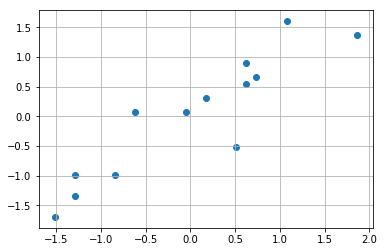

In [123]:
plt.scatter(Xn[:,0],Xn[:,1])
plt.grid()
plt.show()

Let's calculate the Covariance matrix. Note that the covariance matrix is symmetric and positive semi-definite (has non-negative eigen values).

In [124]:
C = np.cov(Xn.T)
print("Covariance matrix is\n",C)

Covariance matrix is
 [[1.08333333 0.98631656]
 [0.98631656 1.08333333]]


The diagonal component of the matrix correspond to variances of the two features we have (which are one after standardization) and the cross-diagnonal elements correspond to the covariance between our two features (which is pretty high and hence the scatter plot showing high correlation!). As a consequence, it should be possible to reduce the two dimensions to a single one with minimum loss of information. 

Let's calculate the eigen values and principal components and sort them in descending order with respect to eigen values because our maxiumum variance principal component will correspond to the largest Eigen value and the second one will be orthogonal to the first one (proof omitted). We will also plot the scree graph which plots the fraction of variance captured along each dimension.

The eigen values are [2.0696499  0.09701677]
The eigen vectors (principle components) are 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Text(0.5,1,'Scree plot')

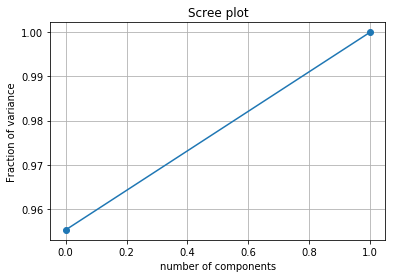

In [125]:
ev,pc = np.linalg.eig(C)
idx = np.argsort(-ev)
ev = ev[idx]
pc = pc[:,idx]
print("The eigen values are",ev)
print("The eigen vectors (principle components) are \n",pc)
#plotting the scree plot
plt.plot(np.cumsum(ev)/np.sum(ev),'o-')
plt.xlabel("number of components")
plt.ylabel("Fraction of variance")
plt.grid()
plt.title("Scree plot")

One interesting thing to note here is that most of the variance is captured by the first principle component (about 95%).  

Let's reduce the dimensionlity to "dr" dimensions.

In [126]:
dr = 1
wx = pc[:,0:dr]
z = np.dot(Xn,wx)
print("Data after transformation\n",z)
print("Standard deviation after transformation",np.std(z,axis=0))

Data after transformation
 [[ 1.86358912]
 [-1.07678772]
 [ 1.29434524]
 [ 2.27327274]
 [ 1.61346575]
 [ 0.38441488]
 [-1.89615496]
 [-0.82666435]
 [ 0.00348587]
 [-0.34079493]
 [-0.98981894]
 [-0.01448576]
 [-2.28786695]]
Standard deviation after transformation [1.38218887]


Let's calculate the direction of maximum variance using a simple for-loop based search to verify that we have actually found the correct answer. We will generate unit vectors along a unit circle and calculate standard deviation after projection along the vector. We will plot the standard deviation vs. the angle. Note that the highest standard deviation corresponds to the first eigen vectors.

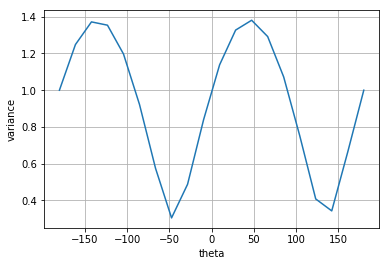

In [127]:
import numpy as np
theta = (2*np.linspace(0,1,20)-1)*np.pi
stdx = np.zeros(theta.shape[0])
for i,t in enumerate(theta):
    wt = [np.cos(t),np.sin(t)]
    stdx[i]=np.std(np.dot(wt,Xn.T))
plt.plot(theta*180/np.pi,stdx)
plt.xlabel("theta")
plt.ylabel("variance")
plt.grid()
plt.show()

Now, Let's calculate the inverse projection. Note that the principle component matrix and its transpose are inverse of each other. We can use this to calculate the inverse transform. We will de-normalize the data and plot the re-projected points.

The principle component matrix multiple by its transpose:
 [[1. 0.]
 [0. 1.]]


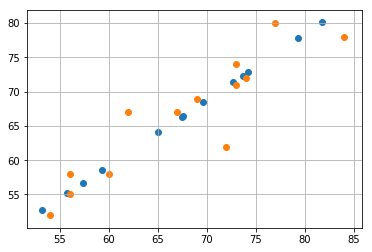

In [128]:
print("The principle component matrix multiple by its transpose:\n",np.dot(pc,pc.T))
iwx = pc.T[:,0:dr] 
Xr = np.dot(z,iwx.T)*Xs+Xm
plt.scatter(Xr[:,0],Xr[:,1])
plt.scatter(X[:,0],X[:,1])
plt.grid()
plt.show()

That's all folks! 

### Exercises

Here is what you can do:

1. Change the data and see its impact. You can change it by adding some gaussian noise using the np.random.randn function. See how this affects the scatter plot, the covariance matrix, the scree plot and the principal components and their Eigen values.

2. Can you overlay the principal components of your data as vectors over the scatter plot to see whether the direction of maxium variance being found is actually correct. 

3. Try changing the number of reduced dimensions from 1 to 2. What happens? Please explain your observations.

4. See how can you apply PCA from the library scikit-learn and use it for classification or regression coupled with an appropriate machine learning model. It is important to note that PCA is an unsupervised technique and labels or target values should not be used while determining the principal components.

5. How do we apply PCA over previously unseen data?

6. How can PCA be used for visualization of high dimension data?

7. How is PCA used in Eigen Faces for face recognitioN?

8. How can PCA be used for clustering (optional).

9. What are the underlying assumptions of PCA? (optional)

10. What are the limitations of PCA? (optional)

11. How can PCA be kernelized? (optional)

12. What happens if you project the data onto the second principal component only? (optional)

13. If the number of features is large, then the covariance matrix is going to be huge. How can we apply PCA to high dimensional data? (Hint: Snapshot method for PCA)

14. How can PCA be used for data transmission?

### Application: Eigen Digits

Let's apply PCA to the MNIST dataset which consists of 8 by 8 images of numbers. We can use the scikit-learn PCA tool. This approach is very similar to Eigen faces which are used for face recognition. We can call this "Eigen Digits".

Let's load the data using sklearn.

In [129]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Let's apply PCA to this data. We will keep the number of principal components equal to the number of dimensions (64) to see how much variance we can capture with increasing the number of components. This can be done using the scree graph which plots the proportion of captured variance vs. the number of components being used.

How many components are required for capturing 90% variance?

How many components are required for near perfect reconstruction?

(1797, 64)
(1797, 64)


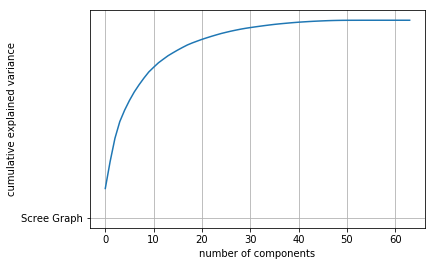

In [130]:
from sklearn.decomposition import PCA #import PCA
pca64 = PCA(n_components=64)
pca64.fit(digits.data) #training PCA
projected = pca64.transform(digits.data) #projecting the data onto Principal components
print(digits.data.shape)
print(projected.shape)
plt.plot(np.cumsum(pca64.explained_variance_ratio_)) #plot the scree graph
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.plot('Scree Graph')
plt.grid()
plt.show()

Let's show the original data and the projected data as images. We take two arbitrary digits and see the effect of applying PCA. Note that the projected digits look nothing like the original ones but are definitely different from each other. Note that the projected digits have a large number of dimensions equal to zero.

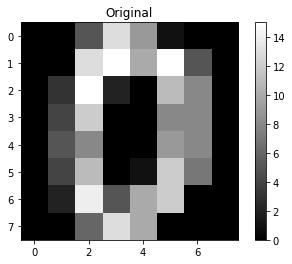

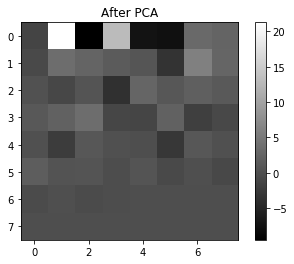

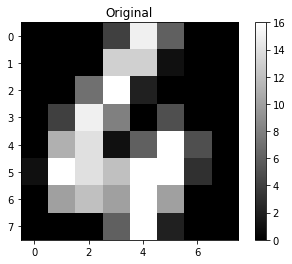

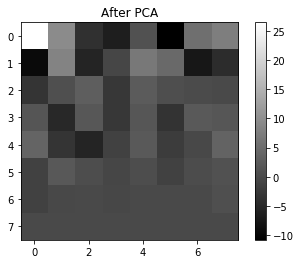

In [131]:
plt.imshow(digits.data[0,:].reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(projected[0,:].reshape(8,8),cmap='gray'); plt.title('After PCA');  plt.colorbar(); plt.show()
plt.imshow(digits.data[900,:].reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(projected[900,:].reshape(8,8),cmap='gray'); plt.title('After PCA');  plt.colorbar();plt.show()


### PCA for visualization

PCA can be used for visualization. Let's plot two principal components against each other. This allows us to visualize 64 dimensional data in two dimensions for exploratory data analysis. As you can see below, you get a pretty good clustering in the PCA space in which similar examples corresponding to the same digit cluster together. 

What digits are more similar to each other? 

What happens when you change the principal components for visualization? 

Can you find the principal components that provide the best separation between classes?

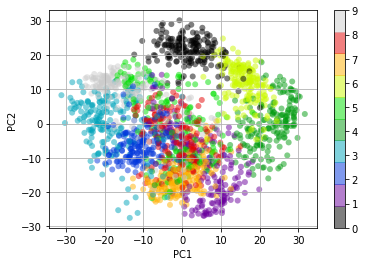

In [132]:
i1 = 0 #first principal component
i2 = 1 #second principal component
plt.scatter(projected[:, i1], projected[:, i2],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

Note that the principal components are 64 dimensional vectors which can be viewed as digits. Below, we show the two principal components selected above and the principal component correspondng to lowest variance. These images show us what kind of patterns are being learned. Notice that the outer boundary is zero for all principal components because no digits occur there so the image can easily be reduced in dimensions.

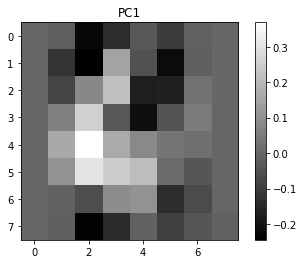

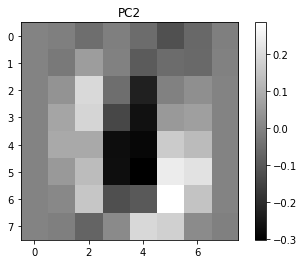

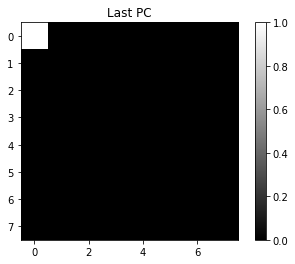

In [133]:
plt.imshow(pca64.components_[i1,:].reshape(8,8),cmap='gray'); plt.title('PC1'); plt.colorbar(); plt.show()
plt.imshow(pca64.components_[i2,:].reshape(8,8),cmap='gray'); plt.title('PC2'); plt.colorbar(); plt.show()
plt.imshow(pca64.components_[-1,:].reshape(8,8),cmap='gray'); plt.title('Last PC'); plt.colorbar(); plt.show()

### PCA Reconstruction
Now we will reduce the image dimensions from $(d,d)$ to $(d_r,d_r)$ by picking the dimensions using PCA. Note that this is different from resizing the image which can incur a large information loss in comparison to PCA. So a (3,3) image of 9 dimensions would allow near perfect reconstruction to the original image but a (64,64) to (3,3) down-scaling can severly affect the image. Below we show the original, transformed and reconstructed image. 

Try it for different digits.

See what is the effect of changing the number of dimensions or reconstruction accuracy? 

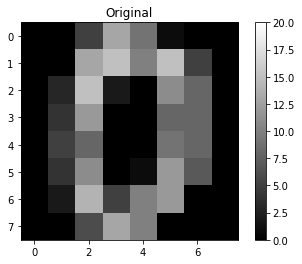

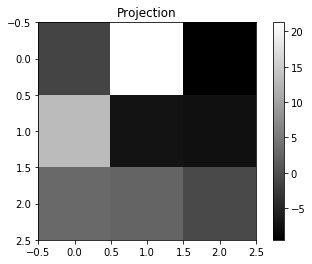

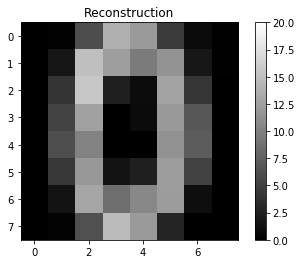

In [134]:
dr = 3
pca = PCA(n_components=dr*dr)
components = pca.fit_transform(digits.data)
reconstruction = pca.inverse_transform(components)
plt.imshow(digits.data[0,:].reshape(8,8),cmap='gray',vmin=0,vmax=20); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(components[0,:].reshape(dr,dr),cmap='gray'); plt.title('Projection'); plt.colorbar(); plt.show()
plt.imshow(reconstruction[0,:].reshape(8,8),cmap='gray',vmin=0,vmax=20); plt.title('Reconstruction'); plt.colorbar(); plt.show()

(c) Dr. Fayyaz Minhas *afsar at pieas dot edu.pk#. [http://faculty.pieas.edu.pk/fayyaz]